# HM5

In [1]:
# importing libraries
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

# creation of a pandas dataframe with nodes coordinates
fileNodes = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\ADM-HM5\\nodesInformations.co", "r")
latitude = 0; longitude = 0; id = 0; matrix = []
with fileNodes as fInput:
    for row in fInput:
        row = row.split()
        if row[0] == "v":
            id = int(row[1])
            latitude = int(row[3][:len(row[3])-1]) / 10 ** (len(row[3]) - 3)
            longitude = -int(row[2][1:len(row[2])-1]) / 10 ** (len(row[2]) - 5)
            matrix.append([id, latitude, longitude])
nodesCoordinates = pd.DataFrame(matrix, columns = ["Id", "Latitude", "Longitude"])
fileNodes.close()

# creation of a pandas dataframe with metrics distances
fileMetricDist = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\ADM-HM5\\distanceMatrixMeters.gr", "r")
matrix = []
with fileMetricDist as fInput:
    for row in fInput:
        row = row.split()
        if row[0] == "a":
            matrix.append([int(row[1]), int(row[2]), int(row[3])])
edgesMetrDist = pd.DataFrame(matrix, columns = ["id_n1", "id_n2", "metric_dist"])
fileMetricDist.close()

# creation of a pandas dataframe with time distances
fileTimeDist = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\ADM-HM5\\distanceMatrixSeconds.gr", "r")
matrix = []
with fileTimeDist as fInput:
    for row in fInput:
        row = row.split()
        if row[0] == "a":
            matrix.append([int(row[1]), int(row[2]), int(row[3])])
edgesTimeDist = pd.DataFrame(matrix, columns = ["id_n1", "id_n2", "time_dist"])
matrix = []

# creation of a pandas dataframe with network distances
fileTimeDist = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\ADM-HM5\\distanceMatrixSeconds.gr", "r")
matrix = []
with fileTimeDist as fInput:
    for row in fInput:
        row = row.split()
        if row[0] == "a":
            matrix.append([int(row[1]), int(row[2]), 1])
edgesNetDist = pd.DataFrame(matrix, columns = ["id_n1", "id_n2", "network_dist"])
fileTimeDist.close(); matrix = []

# choice of the function (made by the user)
choice = 0
while choice != -1:
    choice = input("Insert the number of the function that you want to use (from 1 to 4, -1 to exit). \n1 to find the neighbours in a limited distance\n2 to find the smartest network\n3 to find the shortest path into an ordered list of waypoints\n4 to find the path into a set of waypoints\n")
    while int(choice) not in [-1, 1, 2, 3, 4]:
            choice = input("Insert the number of the function that you want to use (from 1 to 4, -1 to exit). \n1 to find the neighbours in a limited distance\n2 to find the smartest network\n3 to find the shortest path into an ordered list of waypoints\n4 to find the path into a set of waypoints\n")
    if int(choice) == 1:
        source = input("Insert the node where you want to start: ")
        functionDist = input("Insert the type of distances (meters for metric distance, time for time distance or network for network distance): ")
        threshold = input("Insert the threshold: ")
        function1(int(source), functionDist, int(threshold))
    if int(choice) == 2:
        nodes = input("Insert the nodes that you want to include into your walk (divided by a space): ")
        functionDist = input("Insert the type of distances (meters for metric distance, time for time distance or network for network distance): ")
        function2(list(map(int, nodes.split(" "))), functionDist)
    if int(choice) == 3:
        source = input("Insert the node where you want to start: ")
        nodes = input("Insert the nodes that you want to include into your walk (divided by a space): ")
        functionDist = input("Insert the type of distances (meters for metric distance, time for time distance or network for network distance): ")
        function3(int(source), list(map(int, nodes.split(" "))), functionDist)
    if int(choice) == 4:
        source = input("Insert the number of node that represent the node where you want to start: ")
        nodes = input("Insert the nodes that you want to include into your walk (divided by a space): ")
        functionDist = input("Insert the type of distances (meters for metric distance, time for time distance or network for network distance): ")
        function4(int(source), list(map(int, nodes.split(" "))), functionDist)
    if int(choice) == -1: break

Insert the number of the function that you want to use (from 1 to 4, -1 to exit). 
1 to find the neighbours in a limited distance
2 to find the smartest network
3 to find the shortest path into an ordered list of waypoints
4 to find the path into a set of waypoints
-1


### Function1

In [37]:
# The dijkstra algoritm for the first function
def dijkstraF1(ds, s, threshold):
    # initialisation of variables 
    neighbours = [[0, s]]; result = []
    for i in range(max(ds["id_n1"])):
        result.append([-1, 1000000000])
    result[s-1] = [s, 0]
    result = np.array(result)
    while len(neighbours) != 0:
        costs = [neighbour[0] for neighbour in neighbours]
        if min(costs) > threshold: return result
        for neighbour in neighbours:
            if neighbour[0] == min(costs):
                node = neighbour[1]
                elRem = neighbour
        neighbours.remove(elRem)
        app = np.array(ds[ds["id_n1"] == node])
        for j in range(app.shape[0]):
            if app[j, 1] != result[node-1][0]:
                if result[app[j, 1]-1][0] != -1:
                    if result[app[j, 1]-1][1] > result[node-1][1] + app[j, 2]:
                        result[app[j, 1]-1][0] = node
                        result[app[j, 1]-1][1] = result[node-1][1] + app[j, 2]
                else:
                    neighbours.append([result[node-1][1] + app[j, 2], app[j, 1]])
                    result[app[j, 1]-1][0] = node
                    result[app[j, 1]-1][1] = result[node-1][1] + app[j, 2]
    return result

def function1(source, functionDist, threshold):
    finalRes = []
    
    if functionDist == "meters": 
        resultDij = dijkstraF1(edgesMetrDist, source, threshold)
        edCol = "Red"
    if functionDist == "time": 
        resultDij = dijkstraF1(edgesTimeDist, source, threshold)
        edCol = "Blue"
    if functionDist == "network": 
        resultDij = dijkstraF1(edgesNetDist, source, threshold)
        edCol = "Darkgreen"
        
        
    for i in range(len(resultDij)):
        if resultDij[i][1] < threshold:
            finalRes.append([i+1, resultDij[i][0]])
    result = nx.Graph()
    for i in range(len(finalRes)):
        result.add_node(finalRes[i][0])
        result.add_edge(finalRes[i][0], finalRes[i][1])
    colors = []; pos = nx.spring_layout(result)
    for node in result.nodes:
        if node == source:
            colors.append("Red")
        else:
            colors.append("Cyan")
    nx.draw_networkx_nodes(result, pos, node_color = colors)
    nx.draw_networkx_edges(result, pos, edge_color = edCol)
    nx.draw_networkx_labels(result, pos)

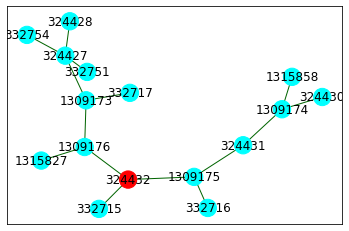

In [38]:
function1(324432, "network", 5)

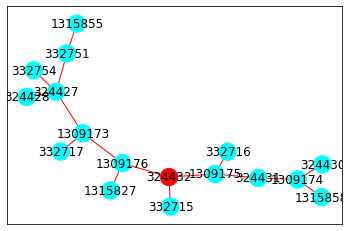

In [42]:
function1(324432, "meters", 2000)

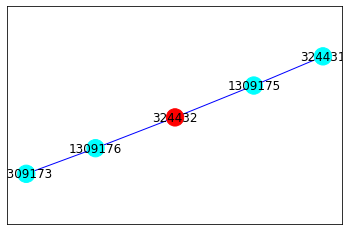

In [40]:
function1(324432, "time", 2000)

### Function 2

In [12]:
def mst_prim(ds, connNodes, notConnNodes):
    # inizialisation of variables
    edges = []; result = []
    
    # costruction of the result
    for i in range(max(ds["id_n1"])):
        result.append([-1, 1000000000])
    result[connNodes[0]-1] = [connNodes[0], 0]
    result = np.array(result)
    
    # initialize of the array that contain the edges
    app = np.array(ds[ds["id_n1"] == connNodes[0]])
    for j in range(app.shape[0]):
        if app[j, 1] in notConnNodes:
            edges.append(app[j])
            
    # Prim's algoritm
    while len(notConnNodes) != 0 and len(edges) != 0:
        costs = [edge[2] for edge in edges]
        for edge in edges:
            if edge[2] == min(costs):
                node = edge[1]
                elRem = edge
                break
        edges.remove(elRem)
        connNodes.append(node); notConnNodes.remove(node)
        app = np.array(ds[ds["id_n1"] == node])
        for j in range(app.shape[0]):
            if app[j, 1] in notConnNodes:
                edges.append(app[j])
        if result[elRem[1]-1][0] == -1:
            result[elRem[1]-1][0] = elRem[0]; result[elRem[1]-1][1] = elRem[2]
    return result

def function2(nodes, functionDist):
    # inizializing principal variables
    finalRes = []
    connNodes = [nodes[0]]; notConnNodes = nodes; notConnNodes.remove(nodes[0])
    
    # construction of the MST with Prim's algorithm
    if functionDist == "meters": 
        resultDij = mst_prim(edgesMetrDist, connNodes, notConnNodes)
        edCol = "Red"
    if functionDist == "time": 
        resultDij = mst_prim(edgesTimeDist, connNodes, notConnNodes)
        edCol = "Blue"
    if functionDist == "network": 
        resultDij = mst_prim(edgesNetDist, connNodes, notConnNodes)
        edCol = "Darkgreen"
    
    # construction of the result
    for node in connNodes + notConnNodes:
        if resultDij[node-1][0] == -1:
            return "Not Possible"
        else:
            finalRes.append([node, resultDij[node-1][0]])
    for el in finalRes:
        if el[0] == el[1]:
            finalRes.remove(el)
    result = nx.Graph()
    for edge in finalRes:
        result.add_nodes_from(edge); result.add_edge(edge[0], edge[1])
    
    # showing the result
    for edge in result.edges:
        print(edge)
    pos = nx.spring_layout(result)
    nx.draw_networkx_nodes(result, pos, node_color = "cyan")
    nx.draw_networkx_edges(result, pos, edge_color = edCol)
    nx.draw_networkx_labels(result, pos)

(1309175, 324432)
(1309175, 332716)
(324432, 332715)


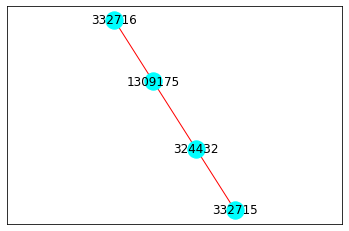

In [13]:
function2([324432, 1309175, 332716, 332715], "meters")

(1309175, 324432)
(1309175, 332716)
(324432, 332715)


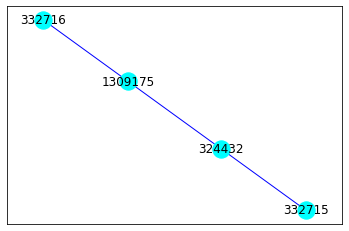

In [82]:
function2([324432, 1309175, 332716, 332715], "time")

(1309175, 324432)
(1309175, 332716)
(324432, 332715)


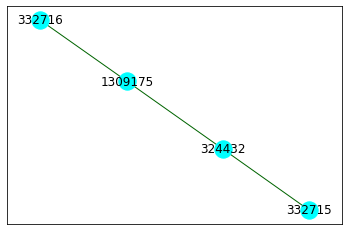

In [14]:
function2([324432, 1309175, 332716, 332715], "network")

### Function3

In [10]:
def dijkstraF3(ds, s, exit):
    neighbours = [[0, s]]; result = []
    for i in range(max(ds["id_n1"])):
        result.append([-1, 1000000000])
    result[s-1] = [s, 0]
    result = np.array(result)
    while len(neighbours) != 0:
        costs = [neighbour[0] for neighbour in neighbours]
        if result[exit-1][0] != -1: return result
        for neighbour in neighbours:
            if neighbour[0] == min(costs):
                node = neighbour[1]
                elRem = neighbour
        neighbours.remove(elRem)
        app = np.array(ds[ds["id_n1"] == node])
        for j in range(app.shape[0]):
            if app[j, 1] != result[node-1][0]:
                if result[app[j, 1]-1][0] != -1:
                    if result[app[j, 1]-1][1] > result[node-1][1] + app[j, 2]:
                        result[app[j, 1]-1][0] = node
                        result[app[j, 1]-1][1] = result[node-1][1] + app[j, 2]
                else:
                    neighbours.append([result[node-1][1] + app[j, 2], app[j, 1]])
                    result[app[j, 1]-1][0] = node
                    result[app[j, 1]-1][1] = result[node-1][1] + app[j, 2]

def function3(source, nodes, functionDist):
    # inizialisation of variables and choice of the edges color
    finalRes = set(); sourceIn = source
    if functionDist == "meters": edCol = "Red"
    if functionDist == "time": edCol = "Blue"
    if functionDist == "network": edCol = "Darkgreen"
    
    # controlling if it's possible to find a path through the nodes
    for node in nodes:
        if len(edgesMetrDist[edgesMetrDist["id_n2"] == node]) == 0:
            return "Not possible"
        
    # extracting the result based on subsequent Dijkstra paths
    for i in range(len(nodes)):
        if functionDist == "meters": resultDij = dijkstraF3(edgesMetrDist, source, nodes[i])
        if functionDist == "time": resultDij = dijkstraF3(edgesTimeDist, source, nodes[i])
        if functionDist == "network": resultDij = dijkstraF3(edgesNetDist, source, nodes[i])
        partRes = set()
        pred=nodes[i]
        while resultDij[pred-1][0] != source: 
            edge = (resultDij[pred-1][0],pred)
            partRes.add(edge)
            pred=resultDij[pred-1][0]
            if resultDij[pred-1][0] == source: 
                partRes.add((pred,source))
        if resultDij[pred-1][0] == source: 
                partRes.add((pred,source))
        source = nodes[i]
        finalRes = finalRes.union(partRes)
    
    # creation of result graph
    result = nx.Graph()
    for edge in finalRes:
        result.add_nodes_from(edge); result.add_edge(edge[0], edge[1])
        
    # vizualization of the result
    colors = []; pos = nx.spring_layout(result)
    for node in result.nodes:
        if node == sourceIn:
            colors.append("Red")
        else:
            colors.append("Cyan")
    nx.draw_networkx_nodes(result, pos, node_color = colors)
    nx.draw_networkx_edges(result, pos, edge_color = edCol)
    nx.draw_networkx_labels(result, pos)

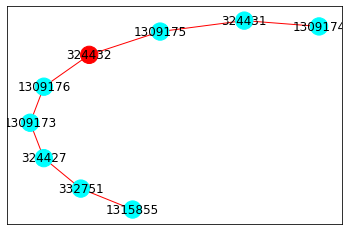

In [16]:
function3(324432, [332751, 1315855, 1309174], "meters")

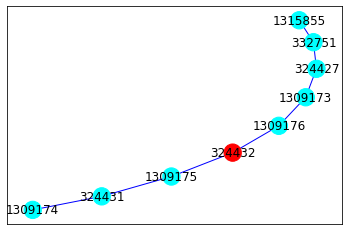

In [12]:
function3(324432, [332751, 1315855, 1309174], "time")

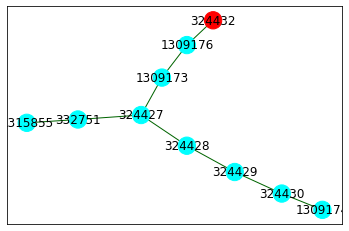

In [13]:
function3(324432, [332751, 1315855, 1309174], "network")

### Function 4

In [24]:
# importing libraries
import numpy as np
import networkx as nx

def dijkstraF4(ds, s, nodes):
    neighbours = [[0, s]];
    result = []
    for i in range(max(ds["id_n1"])):
        result.append([-1, 1000000000])
    result[s - 1] = [s, 0]
    result = np.array(result)
    while len(neighbours) != 0:
        costs = [neighbour[0] for neighbour in neighbours]
        for el in nodes:
            if result[el - 1][0] != -1: return el, result
        for neighbour in neighbours:
            if neighbour[0] == min(costs):
                node = neighbour[1]
                elRem = neighbour
        neighbours.remove(elRem)
        app = np.array(ds[ds["id_n1"] == node])
        for j in range(app.shape[0]):
            if app[j, 1] != result[node - 1][0]:
                if result[app[j, 1] - 1][0] != -1:
                    if result[app[j, 1] - 1][1] > result[node - 1][1] + app[j, 2]:
                        result[app[j, 1] - 1][0] = node
                        result[app[j, 1] - 1][1] = result[node - 1][1] + app[j, 2]
                else:
                    neighbours.append([result[node - 1][1] + app[j, 2], app[j, 1]])
                    result[app[j, 1] - 1][0] = node
                    result[app[j, 1] - 1][1] = result[node - 1][1] + app[j, 2]


def function4(source, nodes, functionDist, ds):
    # inizialisation of variables and choice of the edges color
    finalRes = set();
    sourceIn = source
    if functionDist == "meters": edCol = "Red"
    if functionDist == "time": edCol = "Blue"
    if functionDist == "network": edCol = "Darkgreen"

    # controlling if it's possible to find a path through the nodes
    for node in nodes:
        if len(ds[ds["id_n2"] == node]) == 0:
            return "Not possible"

    # extracting the result based on subsequent Dijkstra paths
    while len(nodes) != 0:
        if functionDist == "meters": node, resultDij = dijkstraF4(ds, source, nodes)
        if functionDist == "time": node, resultDij = dijkstraF4(ds, source, nodes)
        if functionDist == "network": node, resultDij = dijkstraF4(ds, source, nodes)
        pred = node; partRes = set(); nodes.remove(node)
        while resultDij[pred - 1][0] != source:
            edge = (resultDij[pred - 1][0], pred); partRes.add(edge)
            pred = resultDij[pred - 1][0]
            if resultDij[pred - 1][0] == source:
                partRes.add((pred, source))
        if resultDij[pred - 1][0] == source:
                partRes.add((pred, source))
        source = node; finalRes = finalRes.union(partRes); 

    # creation of result graph
    result = nx.Graph()
    for edge in finalRes:
        result.add_nodes_from(edge);
        result.add_edge(edge[0], edge[1])

    # vizualization of the result
    colors = [];
    pos = nx.spring_layout(result)
    for node in result.nodes:
        if node == sourceIn:
            colors.append("Red")
        else:
            colors.append("Cyan")
    nx.draw_networkx_nodes(result, pos, node_color=colors)
    nx.draw_networkx_edges(result, pos, edge_color=edCol)
    nx.draw_networkx_labels(result, pos)

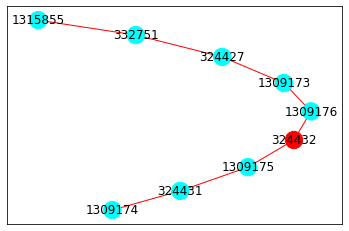

In [25]:
function4(324432, [332751, 1315855, 1309174], "meters", edgesMetrDist)

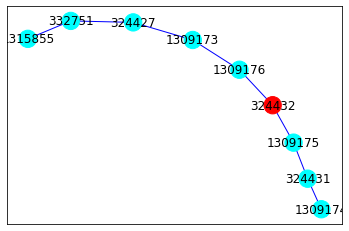

In [26]:
function4(324432, [332751, 1315855, 1309174], "time", edgesTimeDist)

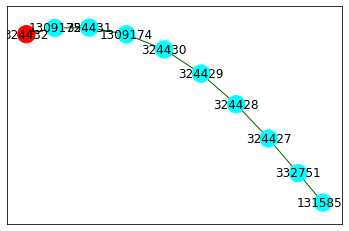

In [27]:
function4(324432, [332751, 1315855, 1309174], "network", edgesNetDist)

## Function 4 by using A* algorithm:

In [3]:
#%% libraries:
import pandas as pd
import math
import networkx as nx

#%% Reading data:

coordinate = pd.read_csv(r'/home/shekoufeh/data/coordinate.txt',header = None, delimiter = ' ')
coordinate.columns = ['v','Id_Node', 'Latitude', 'Longitude']
coordinate.drop('v', axis = 1, inplace = True)

distance = pd.read_csv(r'/home/shekoufeh/data/distance.txt',header = None, delimiter = ' ')
distance.columns = ['a', 'Id_Node1', 'Id_Node2', 'd']
distance.drop('a', axis = 1, inplace = True)

time = pd.read_csv(r'/home/shekoufeh/data/time.txt',header = None , delimiter = ' ')
time.columns = ['a','Id_Node1', 'Id_Node2', 't']
time.drop('a', axis = 1, inplace = True)


In [4]:
#%% defining sub-functions for distance:

# Euclidean distance:
def ED(x,y):
    d = (((x['Latitude']-y['Latitude']) ** 2) + ((x['Longitude']-y['Longitude']) ** 2)) ** 0.5
    #d = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
    return d

# finding successors:
def SCS_dist(close_l, coordinate, distance):
    
    df = distance.loc[distance['Id_Node1'] == close_l[-1]]
    df1 = coordinate.loc[coordinate['Id_Node'].isin(df['Id_Node2'])]
    df1 = df1.reset_index(drop=True)
    
    return df1

# calculating g, h and f scores for distance:
def score_dist(p, y, close_l, g, coordinate, distance):
    # i : Id_Node
    dist = distance.loc[(distance['Id_Node1'] == close_l[-1]) & (distance['Id_Node2'] == p)]
    dist = dist.reset_index(drop=True)
    g1 = g + dist.at[0,'d']
    
    #estimating distance from current node to end node
    h = ED(coordinate.loc[coordinate['Id_Node'] == p], y)
    
    f = g1 + h 
    
    return [g1, h, f]

#%% defining sub-functions for time:
    
# estimating time:
def TM(x, y, coordinate, distance, time):

    # square:
     c = [math.floor((x['Latitude'] + y['Latitude'])/2), math.floor((x['Longitude'] + y['Longitude'])/2)] #center
     r = math.floor(ED(x,y))  #radius
 
     # select nodes in the square:
     df_c = coordinate.loc[(coordinate['Longitude'].isin(range(c[1]-r, c[1]+r))) 
                         & (coordinate['Latitude'].isin(range(c[0]-r, c[0]+r)))]
     
     # filter distance and time of selected nodes: 
     df_d = distance.loc[distance['Id_Node2'].isin(df_c['Id_Node'])]
     df_t = time.loc[time['Id_Node2'].isin(df_c['Id_Node'])]
     
     # estimate time by calculating avearge speed in the area:
     speed = ((df_d['d']/df_t['t']).sum())/len(df_t)
     time = round(ED(x,y)/speed)
    
     return time

# finding successors:
def SCS_time(close_l, coordinate, time):
    
    df = time.loc[time['Id_Node1'] == close_l[-1]]
    df1 = coordinate.loc[coordinate['Id_Node'].isin(df['Id_Node2'])]
    df1 = df1.reset_index(drop=True)
    
    return df1

# calculating g, h and f scores for distance:
    
def score_time(p, y, close_l, g, coordinate, time, distance):
# p:current node(Id_Node) ,  y:end node, g:score of previous node(parent node)
    
    t = time.loc[(time['Id_Node1'] == close_l[-1]) & (time['Id_Node2'] == p)]
    t = t.reset_index(drop=True)
    g1 = g + t.at[0,'t']
    
    #estimating distance from current node to end node
    h = TM(coordinate.loc[coordinate['Id_Node'] == p], y, coordinate, distance, time)
    
    f = g1 + h 
    
    return [g1, h, f]

#%% finding path:
def path(close_l, DB):
    cost = 0   
    path = [close_l[-1]]
       
    while path[-1] != x[0]:
        
        # if i == x[0] or i == y[0]:
        #     path.append(i)
        point = DB.loc[DB[0] == path[-1]]
        point = point.reset_index(drop = True)
        path.append(point[4][0])
        cost = cost + point[1][0]
    
    path.reverse() 
    return path, cost

In [5]:
#%%A* algorithm:

# A* algorithm for distance:
def A_dist(x, y, coordinate, distance): 
# x : start point and y : end point
    
    open_l = []
    close_l = []
    # columns: Id_Node, g score, h score, f score, previous node
    DB = pd.DataFrame()
    df = pd.DataFrame()
     
    open_l.append(x[0])
    DB = DB.append([[x[0], 0, ED(x,y), ED(x,y),[]]])
    
    # number of iteration
    itr = 0
    
    # check for infeasible route
    inf = 0
    
    while len(open_l):
                    
    # find node with minimum f score, drop it from open list and add it to close list                
        new_DB = DB.loc[DB[0].isin(open_l)]            
        n = new_DB[3].idxmin()
        close_l.append(DB[0][n])
        open_l.remove(DB[0][n])
    
    # check whether find the end node or not    
        if close_l[-1] == y[0]:
            break
    # find successors of new node that added to close list
        
        df = SCS_dist(close_l, coordinate, distance)
        df = df.reset_index(drop=True)
        
        for i in range(len(df)): 
              p = df["Id_Node"][i]
              Pre_Node = close_l[-1]
              Node = DB.loc[DB[0] == Pre_Node]
              s = score_dist(p, y, close_l, int(Node[1]), coordinate, distance)
             
              if p in DB[0].tolist():
                  exist = DB.loc[DB[0] == p].index[0]
                  if DB[1][exist] > int(s[0]):
                    DB[1][exist] = int(s[0])
                    DB[3][exist] = int(s[2])
    
              else:
                  DB = DB.append([[p, s[0], int(s[1]), int(s[2]), Pre_Node]])
                  open_l.append(p)
                  DB = DB.reset_index(drop=True)
                  
        itr += 1
        if itr >= 1500:
            inf = 1
            break
    
    return close_l, DB, inf


# A* algorithm for time:
    
def A_time(x, y, coordinate, time, distance): 
# x : start point and y : end point
    
    open_l = []
    close_l = []
    # columns: Id_Node, g score, h score, f score, previous node
    DB = pd.DataFrame()
    df = pd.DataFrame()
     
    open_l.append(x[0])
    score = TM(x, y, coordinate, distance, time)
    DB = DB.append([[x[0], 0, score, score,[]]])
    
    # number of iteration
    itr = 0
    
    # check for infeasible route
    inf = 0
    
    while len(open_l):
                    
    # find node with minimum f score, drop it from open list and add it to close list                
        new_DB = DB.loc[DB[0].isin(open_l)]            
        n = new_DB[3].idxmin()
        close_l.append(DB[0][n])
        open_l.remove(DB[0][n])
    
    # check whether find the end node or not    
        if close_l[-1] == y[0]:
            break
    # find successors of new node that added to close list
        
        df = SCS_time(close_l, coordinate, time)
        df = df.reset_index(drop=True)
        
        for i in range(len(df)): 
            
              p = df["Id_Node"][i]
              Pre_Node = close_l[-1]
              Node = DB.loc[DB[0] == Pre_Node]
              s = score_time(p, y, close_l, int(Node[1]), coordinate, time, distance)
              if p == y[0]:
                  s[1] = 0
                  s[2] = s[1]
              if p in DB[0].tolist():
                  exist = DB.loc[DB[0] == p].index[0]
                  if DB[1][exist] > int(s[0]):
                    DB[1][exist] = int(s[0])
                    DB[3][exist] = int(s[2])
    
              else:
                  DB = DB.append([[p, s[0], int(s[1]), int(s[2]), Pre_Node]])
                  open_l.append(p)
                  DB = DB.reset_index(drop=True)
                  
        itr += 1
        if itr >= 1500:
            inf = 1
            break
    
    return close_l, DB, inf

# A* algorithm for  network distance:
def A_net(x, y, coordinate, distance): 
# x : start point and y : end point
    
    open_l = []
    close_l = []
    # columns: Id_Node, g score, h score, f score, previous node
    DB = pd.DataFrame()
    df = pd.DataFrame()
     
    open_l.append(x[0])
    DB = DB.append([[x[0], 0, 1, 1,[]]])
    
    # number of iteration
    itr = 0
    
    # check for infeasible route
    inf = 0
    
    while len(open_l):
                    
    # find node with minimum f score, drop it from open list and add it to close list                
        new_DB = DB.loc[DB[0].isin(open_l)]            
        n = new_DB[3].idxmin()
        close_l.append(DB[0][n])
        open_l.remove(DB[0][n])
    
    # check whether find the end node or not    
        if close_l[-1] == y[0]:
            break
    # find successors of new node that added to close list
        
        df = SCS_dist(close_l, coordinate, distance)
        df = df.reset_index(drop=True)
        
        for i in range(len(df)): 
              p = df["Id_Node"][i]
              Pre_Node = close_l[-1]
                
              c = [math.floor((x['Latitude'] + y['Latitude'])/2), math.floor((x['Longitude'] + y['Longitude'])/2)] #center
              r = math.floor(ED(x,y))  #radius

             # select nodes in the square:
              df_c = coordinate.loc[(coordinate['Longitude'].isin(range(c[1]-r, c[1]+r))) 
                                 & (coordinate['Latitude'].isin(range(c[0]-r, c[0]+r)))]
              #s = score_dist(p, y, close_l, int(Node[1]), coordinate, distance)
              s = [1, len(df_c), len(df_c)+1]
              if p in DB[0].tolist():
                  exist = DB.loc[DB[0] == p].index[0]
                  if DB[1][exist] > int(s[0]):
                    DB[1][exist] = int(s[0])
                    DB[3][exist] = int(s[2])
    
              else:
                  DB = DB.append([[p, s[0], int(s[1]), int(s[2]), Pre_Node]])
                  open_l.append(p)
                  DB = DB.reset_index(drop=True)
                  
        itr += 1
        if itr >= 1500:
            inf = 1
            break
    
    return close_l, DB, inf

In [11]:
#Functionality 4 - Shortest Route 

# inputs: 
# a:start node
# c:set of nodes that want to path from start node
# d:distance:'1',time:'2' and network distance'3'

def function4 (a, c, d, cooridnate, time, distance):
    # search shortest path:
    current_node = a-1
    route = []
    m = 0
    feasible = True
    
    while len(c):
            
        r = []
        ct = 10 ** 20
        
        for i in c:
            
            if d == 1:
                x, y, z = A_dist(coordinate.iloc[current_node], coordinate.iloc[i-1], coordinate, distance)
            elif d == 2:
                x, y, z = A_time(coordinate.iloc[current_node], coordinate.iloc[i-1], coordinate, time, distance)
            else:
                x, y, z = A_net(coordinate.iloc[current_node], coordinate.iloc[i-1], coordinate, distance)
                
            if x[-1]  == i:
                p, cost = path(x, y)
                
                check =  any(item in c for item in p[:-1])
                
                if check :
                    continue
                elif cost < ct:
                    ct = cost
                    r = p
                
            elif x[-1] != i  or z == 1:
                feasible = False
                break
    
        if feasible == False:
            break
           
        route = route + r
        m = m + ct
        current_node = r[-1]-1
        c.remove(r[-1])    
    
    if feasible == False:
        print("Not possible!")
    
    
    #%% Visualization 4 - Visualize the Shortest Route 
    
    if feasible :
        edges = []
    
        G=nx.Graph(name="Shoretst path")
        
        route_edges = [(route[n],route[n+1]) for n in range(len(route)-1)]
        G.add_nodes_from(route)
        G.add_edges_from(route_edges)
        edges.append(route_edges)
        
        pos = {}
        for i in route:
            point = coordinate.loc[coordinate['Id_Node'] == i]
            point = point.reset_index(drop=True)
            pos[i] = (point.at[0,'Latitude'], point.at[0,'Longitude'])
        
        nx.draw_networkx_nodes(G,pos=pos)
        nx.draw_networkx_labels(G,pos=pos,font_size = 8)
    
        for ctr, edgelist in enumerate(edges):
            nx.draw_networkx_edges(G, pos = pos, edgelist = edgelist, edge_color = 'purple', width = [2])

/home/shekoufeh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


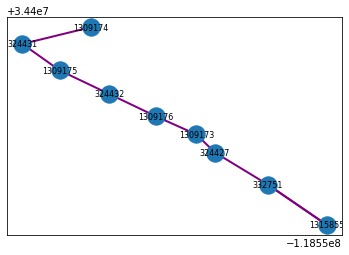

In [14]:
function4(324432, [332751, 1315855, 1309174], 1, coordinate, time, distance)

/home/shekoufeh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars
/home/shekoufeh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


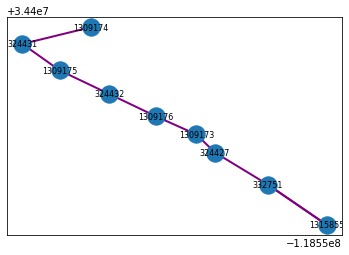

In [15]:
function4(324432, [332751, 1315855, 1309174], 2, coordinate, time, distance)

/home/shekoufeh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


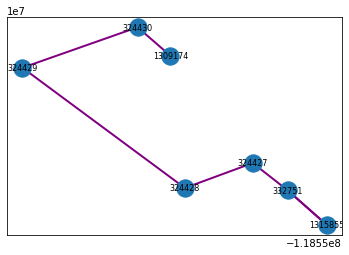

In [16]:
function4(324432, [332751, 1315855, 1309174], 3, coordinate, time, distance)